Implemente los algoritmos de clasificación (RNN y LSTM) para el análisis de sentimiento.

In [194]:
import pandas as pd
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import numpy as np

In [195]:
df = pd.read_csv('dataset.tsv', sep='\t', header=None)
df.columns = ["Sentiment", "Comment"]
df.head()

,Sentiment,Comment
0,neg,ab achanak khawaja saad rafique ko khiyaal aa...
1,neg,"adha drama to censor hi hojaye gaa , khaas to..."
2,neg,bekaar fuzool end !!!!! moti budhi laila jeet...
3,neg,choor kasuri choor jhootay ka moo kaala
4,neg,gali gali mein shor hai gaaanjaaaa shair chor...


## Modelo LSTM

In [196]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN
from tensorflow.keras.optimizers import Adam
import os
from joblib import dump, load

In [197]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens

In [198]:
X = df['Comment']
Y = pd.get_dummies(df['Sentiment']).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [199]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

In [200]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(64))  # Capa LSTM con 64 unidades
model.add(Dense(Y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [205]:
history_lstm = None
if os.path.exists('history_lstm.joblib'):
    history_lstm = load('history_lstm.joblib')
    print("El archivo 'history_lstm.joblib' ya existe. Se ha cargado el historial del entrenamiento.")
else:
    history = model.fit(X_train_seq, Y_train, epochs=30, batch_size=32, verbose=2)
    dump(history.history, 'history_lstm.joblib')
    print("El entrenamiento se ha completado y el historial ha sido guardado en 'history_lstm.joblib'.")

El archivo 'history_lstm.joblib' ya existe. Se ha cargado el historial del entrenamiento.


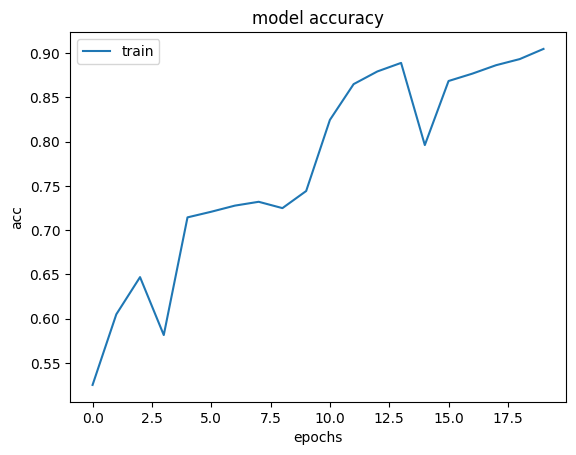

In [206]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left');

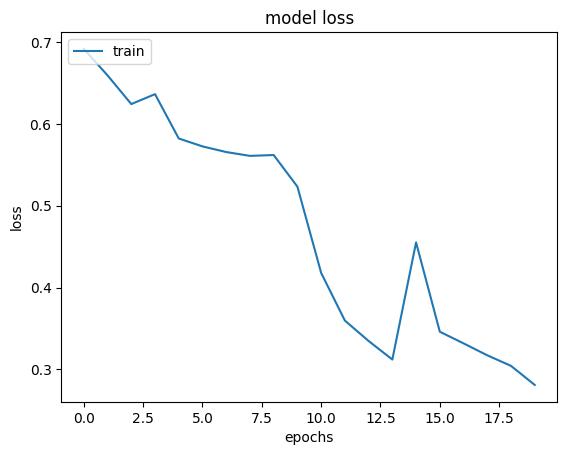

In [207]:
plt.plot(history.history['loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epochs');
plt.legend(['train', 'test'], loc='upper left');

In [208]:
_, train_acc = model.evaluate(X_train_seq, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test_seq, Y_test, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

293/293 - 21s - loss: 0.0057 - accuracy: 0.9975 - 21s/epoch - 70ms/step
52/52 - 4s - loss: 2.1373 - accuracy: 0.7485 - 4s/epoch - 77ms/step
Train: 0.998, Test: 0.748
Train: 0.998, Test: 0.7485


In [209]:
yhat_probs = model.predict(X_test_seq, verbose=0)
yhat_classes = np.argmax(yhat_probs, axis=1)

In [210]:
rounded_labels=np.argmax(Y_test, axis=1)

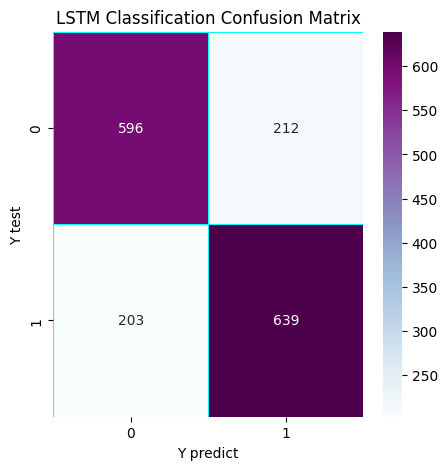

In [211]:
from sklearn.metrics import confusion_matrix

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

## Modelo RNN

In [ ]:
model_RNN = Sequential()
model_RNN.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_RNN.add(SimpleRNN(64))
model_RNN.add(Dense(Y.shape[1], activation='softmax'))
model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_RNN = None
if os.path.exists('history_RNN.joblib'):
    history_RNN = load('history_RNN.joblib')
    print("El archivo 'history_RNN.joblib' ya existe. Se ha cargado el historial del entrenamiento.")
else:
    history_RNN = model_RNN.fit(X_train_seq, Y_train, epochs=30, batch_size=32, verbose=2)
    dump(history.history, 'history_RNN.joblib')
    print("El entrenamiento se ha completado y el historial ha sido guardado en 'history_RNN.joblib'.")

Epoch 1/30
293/293 - 8s - loss: 0.6525 - accuracy: 0.6365 - 8s/epoch - 27ms/step
Epoch 2/30
293/293 - 7s - loss: 0.3640 - accuracy: 0.8449 - 7s/epoch - 25ms/step
Epoch 3/30
293/293 - 6s - loss: 0.1445 - accuracy: 0.9487 - 6s/epoch - 21ms/step
Epoch 4/30
293/293 - 10s - loss: 0.0492 - accuracy: 0.9872 - 10s/epoch - 35ms/step
Epoch 5/30
293/293 - 10s - loss: 0.0339 - accuracy: 0.9920 - 10s/epoch - 33ms/step
Epoch 6/30
293/293 - 6s - loss: 0.1765 - accuracy: 0.9360 - 6s/epoch - 22ms/step
Epoch 7/30
293/293 - 6s - loss: 0.0648 - accuracy: 0.9800 - 6s/epoch - 21ms/step
Epoch 8/30
293/293 - 6s - loss: 0.0279 - accuracy: 0.9934 - 6s/epoch - 21ms/step
Epoch 9/30
293/293 - 6s - loss: 0.0191 - accuracy: 0.9952 - 6s/epoch - 21ms/step
Epoch 10/30
293/293 - 6s - loss: 0.0128 - accuracy: 0.9960 - 6s/epoch - 22ms/step
Epoch 11/30
293/293 - 6s - loss: 0.0118 - accuracy: 0.9964 - 6s/epoch - 22ms/step
Epoch 12/30
293/293 - 6s - loss: 0.0111 - accuracy: 0.9963 - 6s/epoch - 21ms/step
Epoch 13/30
293/293 -

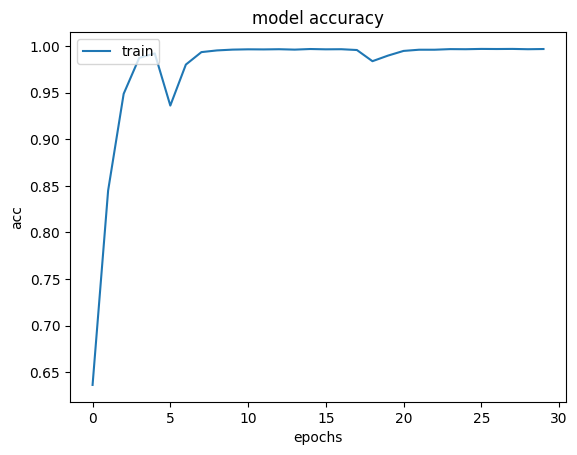

In [ ]:
plt.plot(history_RNN.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left');

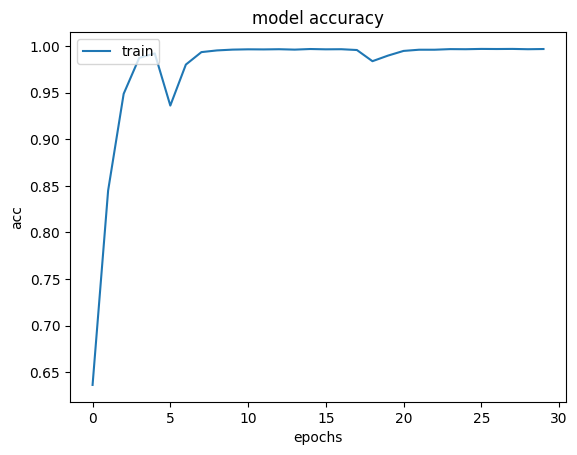

In [ ]:
plt.plot(history_RNN.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left');

In [ ]:
_, train_acc = model_RNN.evaluate(X_train_seq, Y_train, verbose=2)
_, test_acc = model_RNN.evaluate(X_test_seq, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

293/293 - 2s - loss: 0.0059 - accuracy: 0.9974 - 2s/epoch - 7ms/step
52/52 - 0s - loss: 1.6275 - accuracy: 0.7145 - 369ms/epoch - 7ms/step
Train: 0.997, Test: 0.7145


In [ ]:
yhat_probs = model_RNN.predict(X_test_seq, verbose=0)
yhat_classes = np.argmax(yhat_probs, axis=1)

In [ ]:
rounded_labels=np.argmax(Y_test, axis=1)

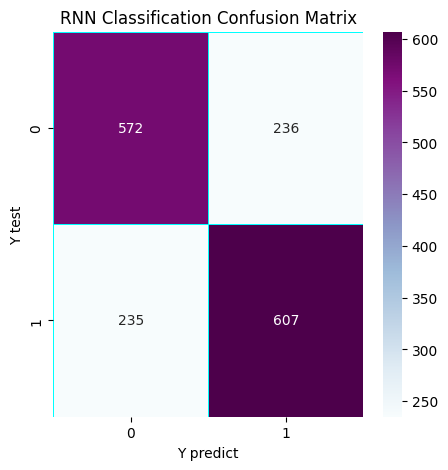

In [ ]:
RNN_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(RNN_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('RNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# HIPERPARAMETRIZACIÓN 

In [ ]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [169]:
df = pd.read_csv('dataset.tsv', sep='\t', header=None)
df.columns = ["Sentiment", "Comment"]

In [170]:
df[df['Sentiment']==' '].index
df = df.drop(472)

In [171]:
df['Sentiment'] = df['Sentiment'].replace({'neg': 0, 'pos': 1})
sentences = df['Comment'].values
labels = df['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [ ]:
texts = df.iloc[:, 1].astype(str)
labels = df.iloc[:, 0]  

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

vocab_size = 10000
max_sequence_length = 50
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

def create_model(lstm_units=32, num_lstm_layers=1, dropout_rate=0.2, learning_rate=0.001, embedding_dim=50, sequence_length=50, vocab_size=10000):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=sequence_length))
    
    for i in range(num_lstm_layers - 1):
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.LSTM(lstm_units))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model


param_grid = {
    'lstm_units': [32, 64, 128, 256],
    'num_lstm_layers': [1, 2, 3],
    'batch_size': [16, 32, 64, 128],
    'epochs': [10, 20, 50, 100],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.5],
    'sequence_length': [50, 100, 200, 500],
    'embedding_dim': [50, 100, 200, 300]
}

model = KerasClassifier(build_fn=create_model, vocab_size=vocab_size, sequence_length=max_sequence_length, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 27648 candidates, totalling 82944 fits


In [187]:
print("\nBest Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)


Best Parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'embedding_dim': 50, 'epochs': 20, 'learning_rate': 0.01, 'lstm_units': 32, 'num_lstm_layers': 1}
Best Score: 0.7481532096862793


In [ ]:
data = pd.read_csv('dataset.tsv', sep='\t', header=None)  
texts = data.iloc[:, 1].astype(str)  
labels = data.iloc[:, 0]  

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

vocab_size = 10000
max_sequence_length = 50
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

def create_model(rnn_units=32, num_rnn_layers=1, dropout_rate=0.2, learning_rate=0.001, embedding_dim=50, sequence_length=50, vocab_size=10000):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=sequence_length))
    
    # Añadir capas RNN
    for i in range(num_rnn_layers - 1):
        model.add(tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    # Última capa RNN
    model.add(tf.keras.layers.SimpleRNN(rnn_units))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compilar el modelo
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

param_grid = {
    'units': [32, 64, 128, 256],  # Número de unidades en la capa RNN
    'learning_rate': [0.001, 0.005, 0.01, 0.1],  # Tasa de aprendizaje
    'batch_size': [32, 64, 128],  # Tamaño del lote
    'dropout': [0.2, 0.3, 0.5],  # Tasa de dropout
    'num_layers': [1, 2, 3],  # Número de capas RNN
    'sequence_length': [50, 100, 200],  # Longitud de la secuencia de entrada
    'epochs': [10, 20, 30]  # Número de épocas
}


model = KerasClassifier(build_fn=create_model, vocab_size=vocab_size, sequence_length=max_sequence_length, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_result_ = grid.fit(X_train, y_train)


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


In [184]:
print("\nBest Parameters:", grid_result_.best_params_)
print("Best Score:", grid_result_.best_score_)


Best Parameters: {'batch_size': 16, 'dropout_rate': 0.5, 'embedding_dim': 50, 'epochs': 30, 'learning_rate': 0.001, 'num_rnn_layers': 2, 'rnn_units': 64}
Best Score: 0.522943506638209


Viendo los resultados de los dos modelos, podemos observar claramente que el modelo LSTM tuvo mejores resultados en la parte de la hiperparametrización, con un score de 0.75 y el de recurrente tuvo un score de 0.52. Teniendo en cuenta los parametros dados por el profesor, y la estructura de los modelos, podemos concluir que para crear un buen modelo para poder clasificar de manera correcta el sentimiento de roman urdu, se recomendaria utilizar el modelo LSTM ya que tiene mejor desempeño que el otro, se puede explorar el mejorar el modelo LSTM para una mejora en su rendimiento, o buscar otro modelo que pueda mejorar el score, para no tener sobreajuste como se ve en los modelos principales.